# Лабораторная работа по машинному обучению №2
# Выполнил студент группы 15-В-1 Елипашев П.А.
## Вариант 5 
## Цель лабораторной работы – получение навыков работы с методами классификации.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import interp
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (auc, roc_curve, 
                             precision_recall_curve, 
                             average_precision_score)

from sklearn import datasets
from sklearn.linear_model import perceptron
from sklearn.preprocessing import LabelEncoder
from sklearn import neighbors
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from matplotlib.pylab import rc, plot

df = pd.read_csv('docs/zoo.csv')

C:\Users\elipa\Downloads\WinPython-32bit-3.5.4.0Qt5\python-3.5.4\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\elipa\Downloads\WinPython-32bit-3.5.4.0Qt5\python-3.5.4\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
## Этот набор данных состоит из 101 жиаотного из зоопарка. 16 показателей с различными чертами для описания животных. Существует 7 типов: млекопитающие, птицы, рептилии, рыбы, амфибии, жуки и беспозвоночные.
### Атрибутивная информация:
#### animal_name - индивидуальное имя для каждого животного
#### hair - Волосы
#### feathers - Перья
#### eggs - Яйца
#### milk - Молоко
#### airborne - Воздушный
#### aquatic - Водный
#### predator - Хищник
#### toothed - Зубастый
#### backbone - Позвоночный
#### breathes - Дышащий
#### venomous - Ядовитый: Будем распазновать какое животное ядовитое , а какое не ядовитое
#### fins - Плавники
#### legs - Количество ног( область значений:{0,2,4,5,6,8})
#### Хвостатые
#### Домашние
#### Размером с кота

In [2]:
df.shape

(101, 18)

## 2.Удалите дубликаты строк в наборе данных;

In [3]:
df = df.drop_duplicates()
df = df.dropna()
df.drop(['animal_name'], axis=1, inplace=True)
df.shape

(101, 17)

In [4]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## 3. Оцените сбалансированность данных по классам (постройте гистограмму)

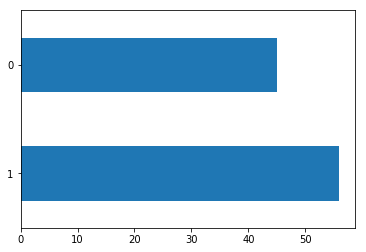

In [5]:
%matplotlib inline
df['predator'].value_counts().plot.barh()
plt.show()

## 4. Выполните масштабирование количественных признаков 

In [6]:
numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']
categorial:  []


In [7]:
df['class_type'] = df['class_type'].apply(lambda x: str(x))

#заново выделим категориальные и числовые
numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']
categorial:  ['class_type']


In [8]:
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0,1
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0,1
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0,1
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0,1


## 5. Выполните замену категориальных признаков

In [9]:
for i in categorial_columns:
    print(i,': ', df[i].unique())

class_type :  ['1' '4' '2' '7' '6' '5' '3']


In [10]:
binary_columns = [i for i in categorial_columns if len(df[i].unique()) == 2]
nonbinary_columns = [i for i in categorial_columns if len(df[i].unique()) > 2]

# для бинарных заменим значения на 1 и 0
for col in binary_columns:
    for i, unic_item in enumerate(df[col].unique()):
        df[col] = df[col].replace(to_replace=[unic_item], value=[i])
        
# для не бинарых применим dummy-кодирование
df_nonbinary = pd.get_dummies(df[nonbinary_columns])
df.drop(nonbinary_columns, axis=1, inplace=True)
df = pd.concat([df_nonbinary, df] , axis=1)

print(df.shape)
df.head()

(101, 23)


,class_type_1,class_type_2,class_type_3,class_type_4,class_type_5,class_type_6,class_type_7,hair,feathers,eggs,...,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,0,0,0,0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0
1,1,0,0,0,0,0,0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0
2,0,0,0,1,0,0,0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1,0,0,0,0,0,0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0
4,1,0,0,0,0,0,0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0


## 6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

In [11]:
df.head()

,class_type_1,class_type_2,class_type_3,class_type_4,class_type_5,class_type_6,class_type_7,hair,feathers,eggs,...,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,0,0,0,0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0
1,1,0,0,0,0,0,0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0
2,0,0,0,1,0,0,0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1,0,0,0,0,0,0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0
4,1,0,0,0,0,0,0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0


              class_type_1  class_type_2  class_type_3  class_type_4  \
class_type_1      1.000000     -0.410761     -0.188654     -0.317722   
class_type_2     -0.410761      1.000000     -0.113402     -0.190987   
class_type_3     -0.188654     -0.113402      1.000000     -0.087716   
class_type_4     -0.317722     -0.190987     -0.087716      1.000000   
class_type_5     -0.167865     -0.100906     -0.046344     -0.078050   
class_type_6     -0.242449     -0.145739     -0.066935     -0.112729   
class_type_7     -0.274028     -0.164722     -0.075653     -0.127412   
hair              0.878503     -0.427851     -0.196503     -0.330941   
feathers         -0.410761      1.000000     -0.113402     -0.190987   
eggs             -0.938848      0.419248      0.099944      0.324287   
milk              1.000000     -0.410761     -0.188654     -0.317722   
airborne         -0.366765      0.656553     -0.127412     -0.214581   
aquatic          -0.362613     -0.058552     -0.074542      0.51

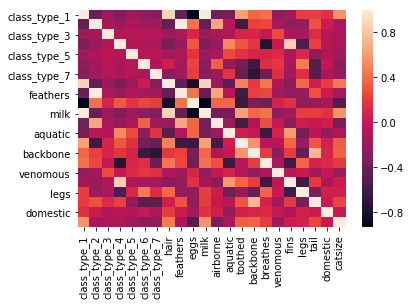

In [12]:
corr_matrix = df.drop('predator', axis=1).corr()
sns.heatmap(corr_matrix);
print(corr_matrix)

## 7 задание в исполнении не нуждается, так как пропусков нет

## 8. Решите поставленную задачу классификации в соответствии с заданием

In [13]:
# Дерево
dtc = DecisionTreeClassifier()
X, y = df.drop('predator', axis=1), df['predator']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
params = {'max_depth': list(range(1,12)), 'max_features': list(range(1,12))}

dtc_grid = GridSearchCV(dtc, params)
dtc_grid.fit(X_train, y_train)

best_features = dtc_grid.best_estimator_.max_features
best_depth = dtc_grid.best_estimator_.max_depth
best_score = dtc_grid.best_score_
print('best train score:', best_score, 
      '\t at features number:', best_features,
      '\t at depth:', best_depth)

dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
dtc.fit(X_train, y_train)
best_score  = np.mean(y_test == dtc.predict(X_test))
print('test score: ', best_score)

best train score: 0.7 	 at features number: 2 	 at depth: 5
test score:  0.483870967742


In [14]:
knn = neighbors.KNeighborsClassifier()
df1 = df.copy()
params = {'n_neighbors': list(range(1, 30))}
knn_grid = GridSearchCV(knn, params)
knn_grid.fit(X_train, y_train)
best_num = knn_grid.best_estimator_.n_neighbors
best_score = knn_grid.best_score_

print('best train score: ', best_score,
      '\t at neighbors number: ', best_num)

best train score:  0.7 	 at neighbors number:  28


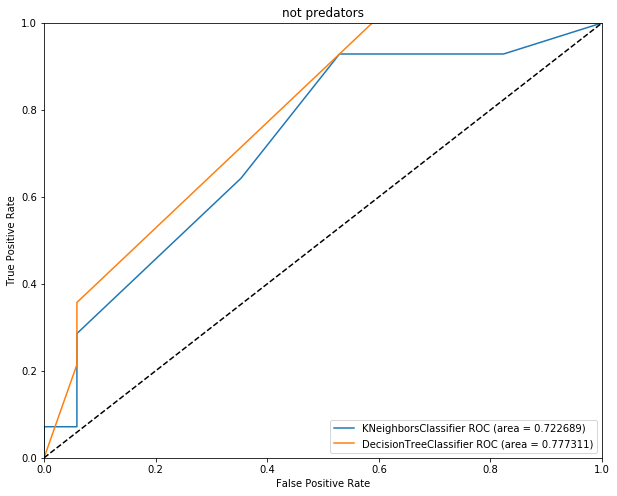

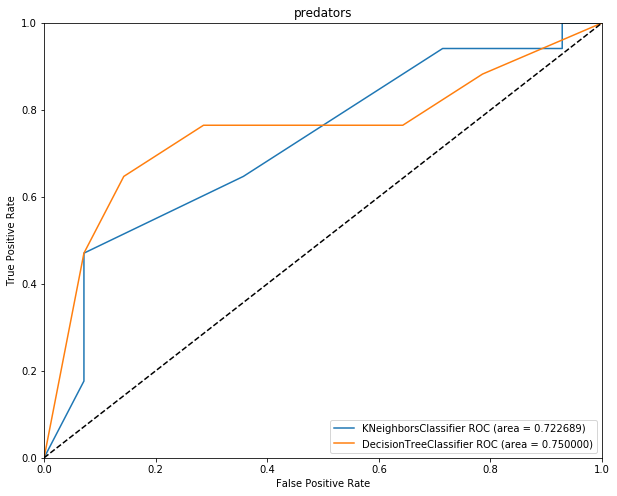

In [15]:
plt.figure(figsize=(10,8))
# K соседей
knn = KNeighborsClassifier ( n_neighbors =best_num)
probas_knn0 = knn.fit(X_train, y_train).predict_proba (X_test)
tpr, fpr, thresholds = roc_curve(y_test, probas_knn0[:,0])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('KNeighborsClassifier', roc_auc)) 

# решающее дерево
dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
probas_dtc0 = dtc.fit(X_train, y_train).predict_proba (X_test)
tpr, fpr, thresholds = roc_curve(y_test, probas_dtc0[:,0])
roc_auc  = auc (fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc))   

# вывод графика
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('not predators')
plt.show()


plt.figure(figsize=(10,8))
# K соседей
knn = KNeighborsClassifier( n_neighbors = best_num)
probas_knn1 = knn.fit(X_train, y_train).predict_proba (X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_knn1[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('KNeighborsClassifier', roc_auc)) 
# решающее дерево
dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
probas_dtc1 = dtc.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_dtc1[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc))   
# вывод графика
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('predators')
plt.show()

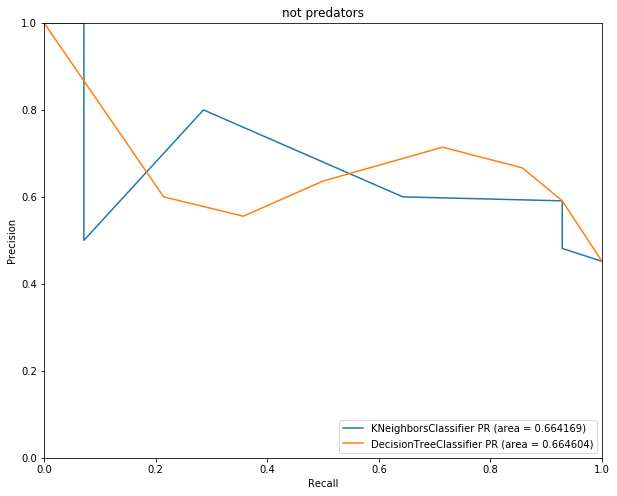

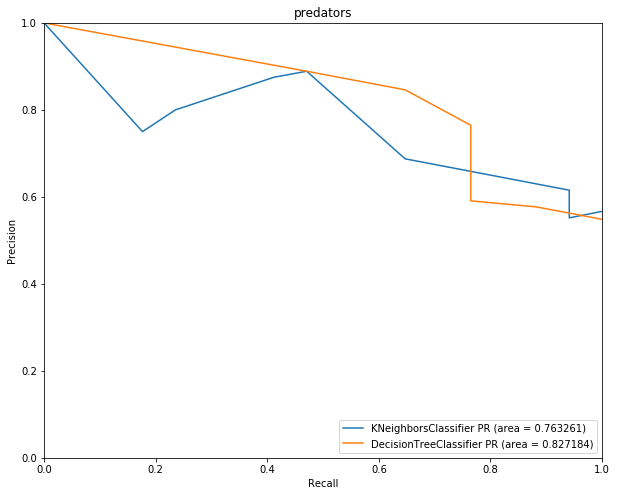

In [16]:
plt.figure(figsize=(10,8))
y_test_invers = []
for i, y in enumerate(y_test.reset_index(drop=True)):
    y_test_invers.append(1-y)
# K соседей
precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_knn1[:,0])
aps_knn1 = average_precision_score(y_test_invers,probas_knn1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('KNeighborsClassifier', aps_knn1)) 
# решающее дерево
precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_dtc1[:,0])
aps_dtc1 = average_precision_score(y_test_invers,probas_dtc1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc1)) 
# вывод графика
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('not predators')
plt.show()


plt.figure(figsize=(10,8))
# K соседей
precision, recall, thresholds = precision_recall_curve(y_test, probas_knn0[:,1])
aps_knn0 = average_precision_score(y_test,probas_knn0[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('KNeighborsClassifier', aps_knn0)) 
# решающее дерево
precision, recall, thresholds = precision_recall_curve(y_test, probas_dtc1[:,1])
aps_dtc1 = average_precision_score(y_test,probas_dtc1[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc1)) 
# вывод графика
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('predators')
plt.show()

## Вывод:
### Классификаторы дерево принятия решений и k ближайших соседей. Классификаторы работают неправильно , тк мало данных и они не сбалансированы.